# Data Challenge (Two Sigma)

## Data Cleaning

In [18]:
from datetime import *
from datetime import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# collect links
date_from = date(2013,1,5)
date_to = date(2013,12,28)
address = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
links = []
pointer = date_from
while pointer <= date_to:
    links.append(address + pointer.strftime("%y%m%d") + ".txt")
    pointer += timedelta(days = 7)

In [3]:
# read date
dataframe_list = []
for link in links:
    dataframe_list.append(pd.read_csv(link, header = None, usecols=range(0, 43)))

In [4]:
dataframe_list[13].head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A002,R051,02-00-00,03-30-13,00:00:00,REGULAR,4054425,1395895,03-30-13,04:00:00,...,03-31-13,00:00:00,REGULAR,4055338.0,1396119.0,03-31-13,04:00:00,REGULAR,4055369.0,1396127.0
1,A002,R051,02-00-00,03-31-13,08:00:00,REGULAR,4055384,1396144,03-31-13,12:00:00,...,04-01-13,08:00:00,REGULAR,4055860.0,1396367.0,04-01-13,12:00:00,REGULAR,4056028.0,1396583.0
2,A002,R051,02-00-00,04-01-13,16:00:00,REGULAR,4056233,1396636,04-01-13,20:00:00,...,04-02-13,16:00:00,REGULAR,4057901.0,1397116.0,04-02-13,20:00:00,REGULAR,4058859.0,1397186.0
3,A002,R051,02-00-00,04-03-13,00:00:00,REGULAR,4059091,1397223,04-03-13,04:00:00,...,04-04-13,00:00:00,REGULAR,4060958.0,1397750.0,04-04-13,04:00:00,REGULAR,4060977.0,1397753.0
4,A002,R051,02-00-00,04-04-13,08:00:00,REGULAR,4061018,1397859,04-04-13,12:00:00,...,04-05-13,08:00:00,REGULAR,4062852.0,1398436.0,04-05-13,12:00:00,REGULAR,4063037.0,1398688.0


In [5]:
def clean(df):
    info =  df.iloc[:,0:3]
    df1 = pd.concat([info,df.iloc[:,3:8]],axis=1)
    df2 = pd.concat([info,df.iloc[:,8:13]],axis=1)
    df3 = pd.concat([info,df.iloc[:,13:18]],axis=1)
    df4 = pd.concat([info,df.iloc[:,18:23]],axis=1)
    df5 = pd.concat([info,df.iloc[:,23:28]],axis=1)
    df6 = pd.concat([info,df.iloc[:,28:33]],axis=1)
    df7 = pd.concat([info,df.iloc[:,33:38]],axis=1)
    df8 = pd.concat([info,df.iloc[:,38:43]],axis=1)
    listofdf = [df1,df2,df3,df4,df5,df6,df7,df8]
    for df in listofdf:
        df.columns = ['C/A','UNIT','SCP','DATE','TIME','DESC','ENTRIES','EXITS']
    wholedf = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)
    return(wholedf.sort_values(by = ['C/A','UNIT','SCP','DATE','TIME']))  

In [6]:
data_2013 = pd.concat([clean(i) for i in dataframe_list], axis = 0)

In [7]:
data_2013 = data_2013.reset_index()

In [8]:
data_2013.drop(['index'], axis = 1, inplace = True)

In [9]:
data_2013.loc[data_2013['DATE'] == '04-06-13'].shape

(30601, 8)

In [10]:
data_2013_removed = data_2013[data_2013['DATE'].notnull()]

In [11]:
data_2013_removed.loc[data_2013_removed['DATE']=='01-12-13'].shape

(29530, 8)

In [12]:
stationname = pd.read_excel('Remote-Booth-Station.xls')

In [13]:
stationname['Station'].nunique()

395

In [14]:
stationname.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [15]:
#(stationname['Remote'].value_counts()>1).any()
(stationname['Booth'].value_counts()>1).any()

False

In [16]:
stationname = stationname[['Booth', 'Station']]

In [17]:
stationname.rename(columns = {'Booth': 'C/A', 'Station': 'STATION'}, inplace = True)

In [18]:
stationname['C/A'].isnull().sum()

0

In [19]:
len(stationname)

768

In [83]:
final_df_2013 = pd.merge(data_2013_removed, stationname, on = ['C/A'])
final_df_2013.drop_duplicates()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE
5,A002,R051,02-00-00,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0,LEXINGTON AVE
6,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,LEXINGTON AVE
7,A002,R051,02-00-00,01-02-13,07:00:00,REGULAR,3932819.0,1355901.0,LEXINGTON AVE
8,A002,R051,02-00-00,01-02-13,10:50:00,REGULAR,3932983.0,1356198.0,LEXINGTON AVE
9,A002,R051,02-00-00,01-02-13,10:51:08,REGULAR,3932984.0,1356198.0,LEXINGTON AVE


In [84]:
final_df_2013['DATETIME'] = pd.to_datetime((final_df_2013['DATE'] + ' ' + final_df_2013['TIME']), format='%m-%d-%y %H:%M:%S')
final_df_2013.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00


In [85]:
final_df_2013 = final_df_2013.loc[final_df_2013['DATETIME'].dt.year != 2012]


In [86]:
final_df_2013['TURNSTILE_ID'] = final_df_2013['C/A'] + '-' + final_df_2013['UNIT'] + '-' + final_df_2013['SCP']

In [87]:
final_df_2013['NET_ENTRIES'] = final_df_2013.groupby(['TURNSTILE_ID','STATION'])['ENTRIES'].transform(pd.Series.diff)
final_df_2013['NET_EXITS'] = final_df_2013.groupby(['TURNSTILE_ID','STATION'])['EXITS'].transform(pd.Series.diff)
final_df_2013

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0
5,A002,R051,02-00-00,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0,LEXINGTON AVE,2013-01-01 23:00:00,A002-R051-02-00-00,120.0,15.0
6,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,LEXINGTON AVE,2013-01-02 03:00:00,A002-R051-02-00-00,24.0,5.0
7,A002,R051,02-00-00,01-02-13,07:00:00,REGULAR,3932819.0,1355901.0,LEXINGTON AVE,2013-01-02 07:00:00,A002-R051-02-00-00,13.0,32.0
8,A002,R051,02-00-00,01-02-13,10:50:00,REGULAR,3932983.0,1356198.0,LEXINGTON AVE,2013-01-02 10:50:00,A002-R051-02-00-00,164.0,297.0
9,A002,R051,02-00-00,01-02-13,10:51:08,REGULAR,3932984.0,1356198.0,LEXINGTON AVE,2013-01-02 10:51:08,A002-R051-02-00-00,1.0,0.0


In [88]:
final_df_2013.loc[final_df_2013['NET_ENTRIES'] < 0, ['NET_ENTRIES']] = np.nan
final_df_2013.loc[final_df_2013['NET_EXITS'] < 0, ['NET_EXITS']] = np.nan

In [89]:
final_df_2013['NET_ENTRIES'].describe()

count    1.120403e+07
mean     1.801791e+03
std      7.813795e+05
min      0.000000e+00
25%      2.000000e+00
50%      5.200000e+01
75%      2.100000e+02
max      9.168486e+08
Name: NET_ENTRIES, dtype: float64

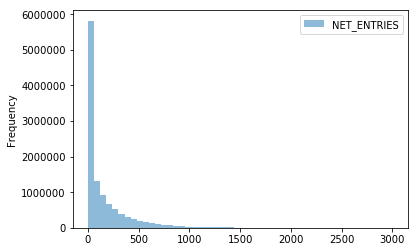

In [28]:
final_df_2013.loc[:,['NET_ENTRIES']].plot.hist(range = (0,3000), bins = (50), color='tab:blue', alpha = 0.5)
plt.show()

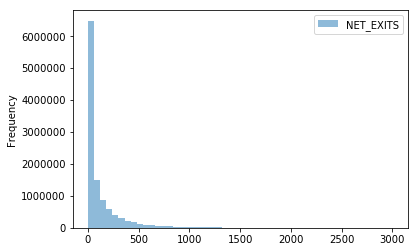

In [27]:
final_df_2013.loc[:,['NET_EXITS']].plot.hist(range = (0,3000), bins = (50), color='tab:blue', alpha = 0.5)
plt.show()

In [50]:
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>0) & (final_df_2013['NET_ENTRIES']< 1000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>1000) & (final_df_2013['NET_ENTRIES']< 2000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>2000) & (final_df_2013['NET_ENTRIES']< 3000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>3000) & (final_df_2013['NET_ENTRIES']< 4000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>4000) & (final_df_2013['NET_ENTRIES']< 5000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>5000) & (final_df_2013['NET_ENTRIES']< 6000),].shape)

(8439200, 14)
(179134, 14)
(9781, 14)
(332, 14)
(63, 14)
(36, 14)


In [30]:
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>0) & (final_df_2013['NET_EXITS']< 1000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>1000) & (final_df_2013['NET_EXITS']< 2000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>2000) & (final_df_2013['NET_EXITS']< 3000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>3000) & (final_df_2013['NET_EXITS']< 4000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>4000) & (final_df_2013['NET_EXITS']< 5000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>5000) & (final_df_2013['NET_EXITS']< 6000),].shape)

(8511609, 13)
(125197, 13)
(11751, 13)
(1735, 13)
(178, 13)
(38, 13)


In [73]:
final_df_2013.loc[final_df_2013['NET_ENTRIES'] < 0, ['NET_ENTRIES']] = np.nan
final_df_2013.loc[final_df_2013['NET_ENTRIES'] > 6000, ['NET_ENTRIES']] = np.nan

final_df_2013.loc[final_df_2013['NET_EXITS'] < 0, ['NET_EXITS']] = np.nan
final_df_2013.loc[final_df_2013['NET_EXITS'] > 6000, ['NET_EXITS']] = np.nan

In [74]:
final_df_2013['BUSYNESS'] = final_df_2013['NET_ENTRIES'] + final_df_2013['NET_EXITS']

In [90]:
final_df_2013

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0
5,A002,R051,02-00-00,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0,LEXINGTON AVE,2013-01-01 23:00:00,A002-R051-02-00-00,120.0,15.0
6,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,LEXINGTON AVE,2013-01-02 03:00:00,A002-R051-02-00-00,24.0,5.0
7,A002,R051,02-00-00,01-02-13,07:00:00,REGULAR,3932819.0,1355901.0,LEXINGTON AVE,2013-01-02 07:00:00,A002-R051-02-00-00,13.0,32.0
8,A002,R051,02-00-00,01-02-13,10:50:00,REGULAR,3932983.0,1356198.0,LEXINGTON AVE,2013-01-02 10:50:00,A002-R051-02-00-00,164.0,297.0
9,A002,R051,02-00-00,01-02-13,10:51:08,REGULAR,3932984.0,1356198.0,LEXINGTON AVE,2013-01-02 10:51:08,A002-R051-02-00-00,1.0,0.0


In [91]:
final_df_2013.to_csv('MTA_Turnstile_2013_raw.csv', index = False)

# Analysis and Visualization

In [1]:
from datetime import *
from datetime import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('MTA_Turnstile_2013_raw.csv')
raw_data['DATETIME'] = pd.to_datetime(raw_data['DATETIME'], format='%Y-%m-%d %H:%M:%S')

KeyboardInterrupt: 

In [3]:
data = pd.read_csv('MTA_Turnstile_2013_raw.csv')
data['DATETIME'] = pd.to_datetime(data['DATETIME'], format='%Y-%m-%d %H:%M:%S')
data.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0


In [6]:
data_6000 = data
data_6000.loc[data_6000['NET_ENTRIES'] > 6000, ['NET_ENTRIES']] = np.nan
data_6000.loc[data_6000['NET_EXITS'] > 6000, ['NET_EXITS']] = np.nan
data_6000['BUSYNESS'] = data_6000['NET_ENTRIES'] + data_6000['NET_EXITS']

In [25]:
final_df_2013.loc[final_df_2013['NET_ENTRIES'] > 6000, ['NET_ENTRIES']] = np.nan
final_df_2013.loc[final_df_2013['NET_EXITS'] > 6000, ['NET_EXITS']] = np.nan
final_df_2013['BUSYNESS'] = final_df_2013['NET_ENTRIES'] + final_df_2013['NET_EXITS']

NameError: name 'final_df_2013' is not defined

### Question-1: Which station has the most number of units as of today?

### Question-2: What's the total number of entries & exits across the subway system for August 1, 2013?

In [4]:
df_130801 = data_6000[data_6000['DATE'] == '08-01-13']
print("The total number of entries & exits across the subway system for August 1, 2013 is", df_130801['NET_ENTRIES'].sum() + df_130801['NET_EXITS'].sum(), ".")

The total number of entries & exits across the subway system for August 1, 2013 is 9914630.0 .


### Question-3: What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

In [5]:
test = df_130801

In [6]:
test.sort_values(by = 'BUSYNESS', ascending = False).head(1)['TURNSTILE_ID']

2902485    N063A-R011-00-00-00
Name: TURNSTILE_ID, dtype: object

In [7]:
df_130801.groupby('STATION')['BUSYNESS'].sum().sort_values(ascending = False).head(1)

STATION
34 ST-PENN STA    332402.0
Name: BUSYNESS, dtype: float64

### Question-4: What stations have seen the most usage growth/decline in 2013

In [11]:
df_usage = data_6000

In [12]:
df_usage['MONTH'] = df_usage['DATETIME'].dt.month

In [13]:
df_usage = df_usage.groupby(['STATION', 'MONTH']).BUSYNESS.agg('mean').reset_index()

In [14]:
df_usage.loc[df_usage['BUSYNESS'] == 0, 'BUSYNESS']= 0.01

In [15]:
df_usage['PCT_CHANGE'] = df_usage.groupby('STATION').BUSYNESS.pct_change()
df_usage

,STATION,MONTH,BUSYNESS,PCT_CHANGE
0,1 AVE,1,664.871528,NaN
1,1 AVE,2,627.764179,-0.055811
2,1 AVE,3,632.800995,0.008023
3,1 AVE,4,646.139880,0.021079
4,1 AVE,5,585.075513,-0.094506
5,1 AVE,6,654.076997,0.117936
6,1 AVE,7,573.791538,-0.122746
7,1 AVE,8,572.078217,-0.002986
8,1 AVE,9,609.526963,0.065461
9,1 AVE,10,637.370502,0.045681


In [16]:
print("The top 10 stations with most growth are")
df_usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending=False).head(10)

The top 10 stations with most growth are


STATION
BEACH 90 ST        20.237208
AQUEDUCT TRACK     18.741483
ORCHARD BEACH       4.270974
BEDFORD PARK BL     1.574541
ROCKAWAY PK 116     1.228478
BEACH 98 ST         1.036626
BEACH 44 ST         0.995069
BEACH 105 ST        0.897012
BROAD CHANNEL       0.855182
E TREMONT AVE       0.843580
Name: PCT_CHANGE, dtype: float64

In [17]:
print("The top 10 stations with most decline are")
df_usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending=False).tail(10)


The top 10 stations with most decline are


STATION
MORRISON AVE      -0.020448
GROVE STREET      -0.022510
HOWARD BCH-JFK    -0.024333
MURRAY ST-B'WAY   -0.024882
FRESH POND ROAD   -0.031798
CASTLE HILL AVE   -0.033098
DYCKMAN ST        -0.036695
WHITEHALL ST      -0.040960
AQUEDUCT-N CNDT   -0.054709
LGA AIRPORT CTB         NaN
Name: PCT_CHANGE, dtype: float64

#### Analysis

In [18]:
df_usage.loc[df_usage['STATION'] == 'BEACH 90 ST', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
1734,BEACH 90 ST,1,0.043546,NaN
1735,BEACH 90 ST,2,0.023179,-0.467715
1736,BEACH 90 ST,3,0.082192,2.545988
1737,BEACH 90 ST,4,0.031308,-0.619091
1738,BEACH 90 ST,5,6.526400,207.460894
1739,BEACH 90 ST,6,94.158076,13.427261
1740,BEACH 90 ST,7,118.713128,0.260785
1741,BEACH 90 ST,8,73.192402,-0.383451
1742,BEACH 90 ST,9,45.289967,-0.381220
1743,BEACH 90 ST,10,36.077320,-0.203415


In [19]:
df_usage.loc[df_usage['STATION'] == 'AQUEDUCT TRACK', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
1452,AQUEDUCT TRACK,3,0.373656,NaN
1453,AQUEDUCT TRACK,4,0.025183,-0.932604
1454,AQUEDUCT TRACK,5,0.312676,11.416265
1455,AQUEDUCT TRACK,6,0.128102,-0.590303
1456,AQUEDUCT TRACK,7,0.208723,0.629342
1457,AQUEDUCT TRACK,8,33.123099,157.694251
1458,AQUEDUCT TRACK,9,33.096313,-0.000809
1459,AQUEDUCT TRACK,10,33.327004,0.006970
1460,AQUEDUCT TRACK,11,52.189308,0.565977
1461,AQUEDUCT TRACK,12,46.148936,-0.115740


In [21]:
data.loc[data['STATION'] == 'BEACH 90 ST',].loc[data['DATETIME'].dt.month == 5,]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH
3752402,N184,R416,00-00-00,05-01-13,01:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 01:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752403,N184,R416,00-00-00,05-01-13,05:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 05:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752404,N184,R416,00-00-00,05-01-13,09:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 09:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752405,N184,R416,00-00-00,05-01-13,13:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 13:00:00,N184-R416-00-00-00,0.0,1.0,1.0,5
3752406,N184,R416,00-00-00,05-01-13,17:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 17:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752407,N184,R416,00-00-00,05-01-13,21:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 21:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752408,N184,R416,00-00-00,05-02-13,01:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 01:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752409,N184,R416,00-00-00,05-02-13,05:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 05:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752410,N184,R416,00-00-00,05-02-13,09:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 09:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752411,N184,R416,00-00-00,05-02-13,13:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 13:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5


In [71]:
data.loc[data['STATION'] == 'AQUEDUCT TRACK',].loc[data['DATETIME'].dt.month == 8,]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH,PCT_CHANGE
11162962,N181A,R464,00-05-00,08-01-13,00:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 00:00:00,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162963,N181A,R464,00-05-00,08-01-13,04:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 04:00:00,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162964,N181A,R464,00-05-00,08-01-13,04:00:00,RECOVR AUD,11.0,0.0,AQUEDUCT TRACK,2013-08-01 04:00:00,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162965,N181A,R464,00-05-00,08-01-13,08:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 08:00:00,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162966,N181A,R464,00-05-00,08-01-13,11:04:08,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:08,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162967,N181A,R464,00-05-00,08-01-13,11:04:29,LOGON,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:29,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162968,N181A,R464,00-05-00,08-01-13,11:04:34,DOOR CLOSE,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:34,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162969,N181A,R464,00-05-00,08-01-13,11:04:37,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:37,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162970,N181A,R464,00-05-00,08-01-13,11:04:38,DOOR CLOSE,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:38,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000
11162971,N181A,R464,00-05-00,08-01-13,11:04:39,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:39,N181A-R464-00-05-00,0.0,0.0,0.1,8,0.000000


related link: http://subwaynut.com/ind/aqueduct_racetracka/

In [22]:
df_usage.loc[df_usage['STATION'] == 'LGA AIRPORT CTB', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
3303,LGA AIRPORT CTB,12,480.214286,NaN


In [26]:
data.loc[data['STATION'] == 'LGA AIRPORT CTB',].loc[data['DATETIME'].dt.month == 8,]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH


### Question - 5: What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely?

In [19]:
df_capacity = data_6000.groupby(['STATION','DATE'])['BUSYNESS'].mean().reset_index()
df_capacity.head()


,STATION,DATE,BUSYNESS
0,1 AVE,01-01-13,449.129630
1,1 AVE,01-02-13,739.216667
2,1 AVE,01-03-13,780.350000
3,1 AVE,01-04-13,766.640625
4,1 AVE,01-05-13,624.966667


In [20]:
df_capacity['BUSYNESS'].describe()

count    136424.000000
mean        270.335648
std         163.411867
min           0.000000
25%         151.295498
50%         245.106686
75%         363.714286
max        2772.545455
Name: BUSYNESS, dtype: float64

related link: http://gothamist.com/2013/02/24/person_fatally_struck_by_c_train_in.php

In [38]:
data_close = data_6000.loc[data['DESC'] == 'DOOR CLOSE', ]
data_close.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH
19,A002,R051,02-00-00,01-03-13,09:23:02,DOOR CLOSE,3934607.0,1356627.0,LEXINGTON AVE,2013-01-03 09:23:02,A002-R051-02-00-00,0.0,3.0,3.0,1
50,A002,R051,02-00-01,01-03-13,09:42:47,DOOR CLOSE,3761194.0,813684.0,LEXINGTON AVE,2013-01-03 09:42:47,A002-R051-02-00-01,1.0,0.0,1.0,1
261,A002,R051,02-05-00,01-02-13,10:37:45,DOOR CLOSE,906.0,0.0,LEXINGTON AVE,2013-01-02 10:37:45,A002-R051-02-05-00,0.0,0.0,0.0,1
290,A002,R051,02-05-01,01-02-13,10:38:28,DOOR CLOSE,0.0,464.0,LEXINGTON AVE,2013-01-02 10:38:28,A002-R051-02-05-01,0.0,0.0,0.0,1
298,A002,R051,02-05-01,01-02-13,11:17:57,DOOR CLOSE,0.0,464.0,LEXINGTON AVE,2013-01-02 11:17:57,A002-R051-02-05-01,0.0,0.0,0.0,1


In [39]:
data_close.groupby('DATE')['TURNSTILE_ID'].count().sort_values(ascending = False).head()

DATE
05-07-13    8996
03-22-13    6929
05-09-13    4929
04-05-13    4613
05-10-13    4511
Name: TURNSTILE_ID, dtype: int64

In [40]:
data_close.groupby('DATE')['TURNSTILE_ID'].count().describe()

count     361.000000
mean      861.562327
std       845.684826
min       217.000000
25%       505.000000
50%       664.000000
75%       828.000000
max      8996.000000
Name: TURNSTILE_ID, dtype: float64

In [36]:
data_6000.groupby('DATE')['BUSYNESS'].describe()['mean'].describe()

count    361.000000
mean     280.069725
std       64.935991
min      116.687979
25%      218.112519
50%      311.414639
75%      332.215710
max      363.345489
Name: mean, dtype: float64

## set a model for capacity!

## Visualization

In [7]:
df_Q3 = data[(data['DATE'] >= '07-01-13') & (data['DATE'] <= '09-30-13')]
df_Q3

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS
14229,A002,R051,02-00-00,07-01-13,00:00:00,REGULAR,4175981.0,1434096.0,LEXINGTON AVE,2013-07-01 00:00:00,A002-R051-02-00-00,82.0,21.0,103.0
14230,A002,R051,02-00-00,07-01-13,04:00:00,REGULAR,4175994.0,1434101.0,LEXINGTON AVE,2013-07-01 04:00:00,A002-R051-02-00-00,13.0,5.0,18.0
14231,A002,R051,02-00-00,07-01-13,08:00:00,REGULAR,4176047.0,1434181.0,LEXINGTON AVE,2013-07-01 08:00:00,A002-R051-02-00-00,53.0,80.0,133.0
14232,A002,R051,02-00-00,07-01-13,12:00:00,REGULAR,4176214.0,1434391.0,LEXINGTON AVE,2013-07-01 12:00:00,A002-R051-02-00-00,167.0,210.0,377.0
14233,A002,R051,02-00-00,07-01-13,16:00:00,REGULAR,4176441.0,1434437.0,LEXINGTON AVE,2013-07-01 16:00:00,A002-R051-02-00-00,227.0,46.0,273.0
14234,A002,R051,02-00-00,07-01-13,20:00:00,REGULAR,4177239.0,1434503.0,LEXINGTON AVE,2013-07-01 20:00:00,A002-R051-02-00-00,798.0,66.0,864.0
14235,A002,R051,02-00-00,07-02-13,00:00:00,REGULAR,4177437.0,1434522.0,LEXINGTON AVE,2013-07-02 00:00:00,A002-R051-02-00-00,198.0,19.0,217.0
14236,A002,R051,02-00-00,07-02-13,04:00:00,REGULAR,4177449.0,1434524.0,LEXINGTON AVE,2013-07-02 04:00:00,A002-R051-02-00-00,12.0,2.0,14.0
14237,A002,R051,02-00-00,07-02-13,08:00:00,REGULAR,4177488.0,1434617.0,LEXINGTON AVE,2013-07-02 08:00:00,A002-R051-02-00-00,39.0,93.0,132.0
14238,A002,R051,02-00-00,07-02-13,12:00:00,REGULAR,4177663.0,1434852.0,LEXINGTON AVE,2013-07-02 12:00:00,A002-R051-02-00-00,175.0,235.0,410.0


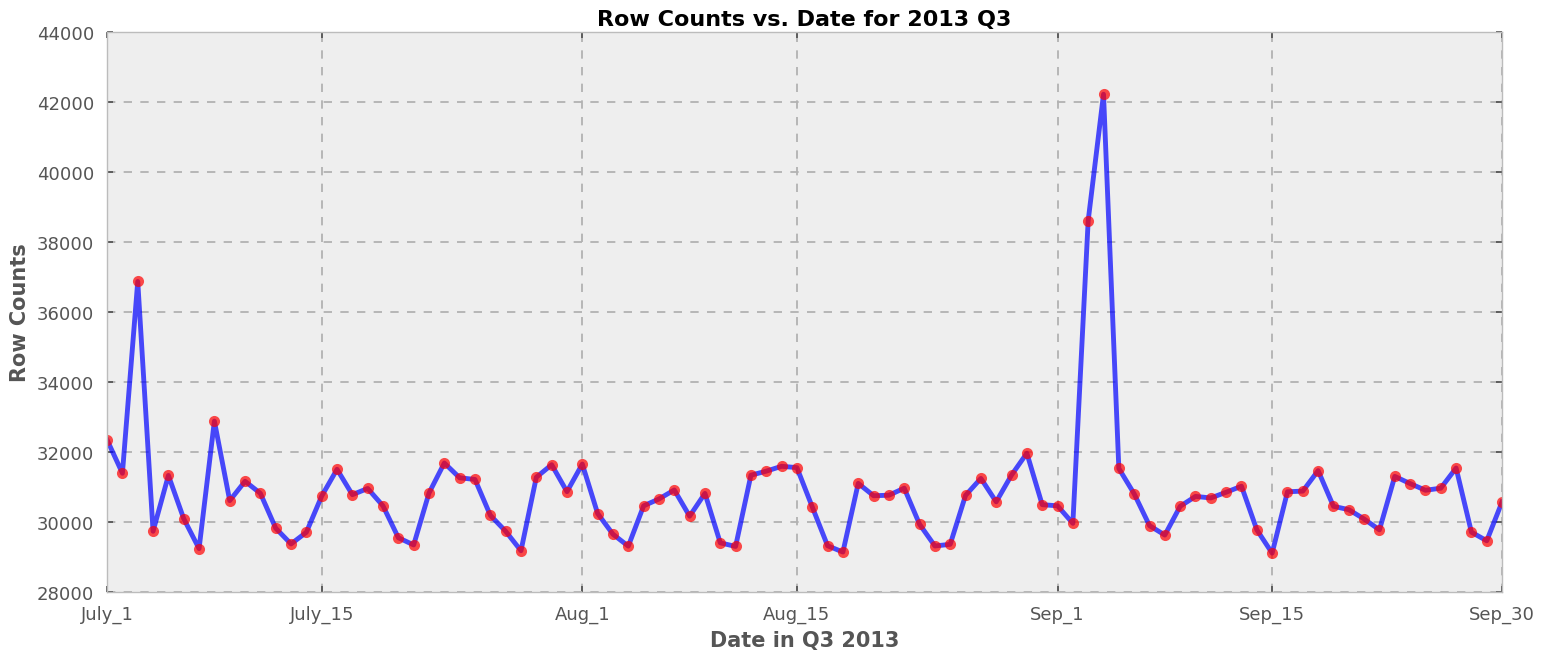

In [68]:
df_Q3.sort_values('DATE').groupby('DATE')['DATE'].agg('count').plot(animated = True, color = 'b', alpha = 0.7, marker = 'o', linewidth=3.5, markersize=8, markerfacecolor = 'r')
plt.style.use('bmh')
fig = plt.gcf()
fig.set_size_inches(18, 7)
plt.title('Row Counts vs. Date for 2013 Q3', fontsize = 16,fontweight='bold')
plt.xlabel('Date in Q3 2013', fontsize = 15, fontweight='bold')
plt.ylabel('Row Counts', fontsize = 15, fontweight='bold')
plt.xticks([0,14,31,45,62,76,91],['July_1','July_15','Aug_1','Aug_15','Sep_1','Sep_15','Sep_30'])
plt.show()

In [29]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [61]:
df_Q3[df_Q3['DATETIME'].dt.month == 9].sort_values('DATE').groupby('DATE')['DATE'].agg('count').sort_values(ascending = False).head()

DATE
09-04-13    42226
09-03-13    38615
09-27-13    31547
09-05-13    31534
09-18-13    31472
Name: DATE, dtype: int64

In [62]:
df_Q3[df_Q3['DATETIME'].dt.month == 7].sort_values('DATE').groupby('DATE')['DATE'].agg('count').sort_values(ascending = False).head()

DATE
07-03-13    36877
07-08-13    32887
07-01-13    32351
07-23-13    31690
07-30-13    31641
Name: DATE, dtype: int64

## 7-3 (independence day) & 9-3 9-4 (labour day)

###  Question - 7: Plot the daily total number of entries & exits across the system for Q3 2013


In [65]:

df_Q3_daily_total = df_Q3.groupby('DATE')['NET_ENTRIES','NET_EXITS'].agg('sum')

,NET_ENTRIES,NET_EXITS
DATE,,
07-01-13,5128423.0,4049349.0
07-02-13,5450678.0,4288218.0
07-03-13,5491630.0,4335869.0
07-04-13,2945789.0,2393680.0
07-05-13,4277804.0,3471644.0
07-06-13,3134979.0,2585392.0
07-07-13,2658357.0,2197122.0
07-08-13,5265881.0,4127513.0
07-09-13,5595112.0,4409002.0


In [70]:
df_Q3_daily_total.rename(columns = {'NET_ENTRIES': 'Daily Total Entries', 'NET_EXITS': 'Daily Total Exits'}, inplace = True)

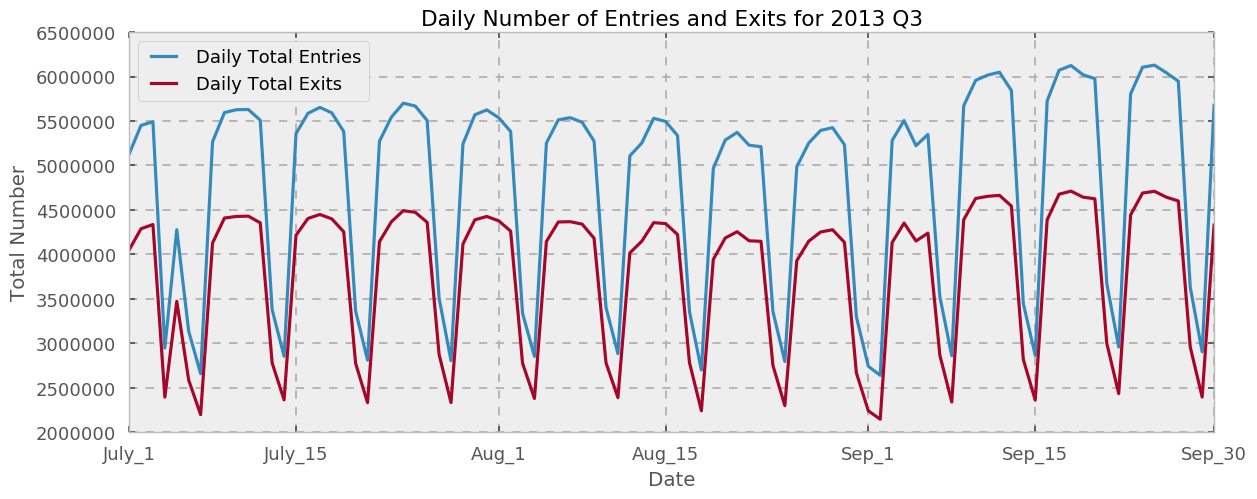

In [72]:
plt.style.use('seaborn-talk')
df_Q3_daily_total.plot()
fig = plt.gcf()
fig.set_size_inches(14, 5, forward=True)
plt.xlabel('Date')
plt.ylabel('Total Number')
plt.title('Daily Number of Entries and Exits for 2013 Q3')
plt.xticks([0,14,31,45,62,76,91],['July_1','July_15','Aug_1','Aug_15','Sep_1','Sep_15','Sep_30'])
plt.show()

###  Question - 8: Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA


In [8]:
df_penn = df_Q3[df_Q3['STATION'] == '34 ST-PENN STA']
df_penn['MONTH'] = df_penn['DATETIME'].dt.month

df_penn_daily = df_penn.groupby(['MONTH', 'DATE'])['NET_ENTRIES', 'NET_EXITS'].agg('sum').reset_index()
df_penn_daily


/Users/monicayan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MONTH,DATE,NET_ENTRIES,NET_EXITS
0,7,07-01-13,172986.0,147500.0
1,7,07-02-13,174709.0,151123.0
2,7,07-03-13,170842.0,165916.0
3,7,07-04-13,75692.0,85673.0
4,7,07-05-13,137768.0,117995.0
5,7,07-06-13,83293.0,78393.0
6,7,07-07-13,83950.0,65409.0
7,7,07-08-13,175269.0,140920.0
8,7,07-09-13,177361.0,151614.0
9,7,07-10-13,176637.0,151179.0


In [110]:
df_penn_daily_error = df_penn_daily.groupby('MONTH')['NET_ENTRIES', 'NET_EXITS'].agg(['mean','std'])
df_penn_daily_error

NET_ENTRIES                    NET_EXITS              
                mean           std           mean           std
MONTH                                                          
7      147594.419355  41738.411189  129546.000000  34693.629991
8      141719.290323  39322.441871  125265.677419  33337.201134
9      142649.666667  43748.087658  124443.966667  36994.095194

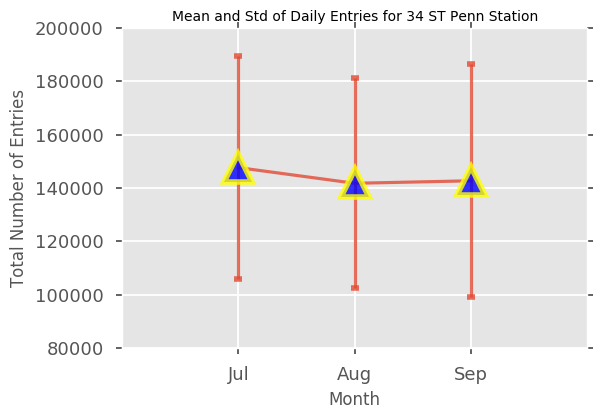

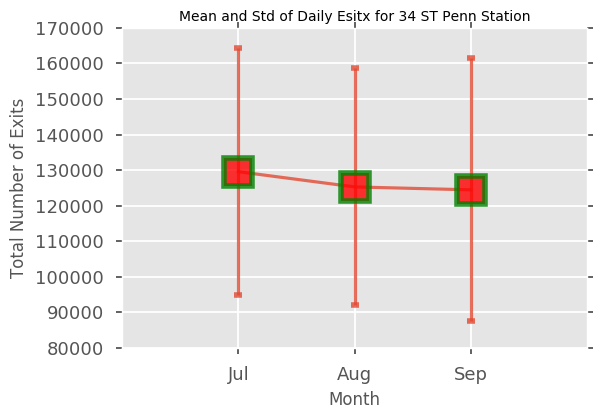

In [136]:
en_std = df_penn_daily_error['NET_ENTRIES', 'std']
en_mean = df_penn_daily_error['NET_ENTRIES', 'mean']
ex_std = df_penn_daily_error['NET_EXITS', 'std']
ex_mean = df_penn_daily_error['NET_EXITS', 'mean']
month = [7,8,9]
plt.errorbar(month, en_mean, yerr = en_std,marker='^', mfc='blue',mec='yellow', ms=20, mew=4, alpha = 0.8)
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(6, 4, forward=True)
plt.xticks([7,8,9],['Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Total Number of Entries')
plt.title('Mean and Std of Daily Entries for 34 ST Penn Station', fontsize = 10)
plt.xlim(6,10)
plt.show()

plt.errorbar(month, ex_mean, yerr = ex_std,marker='s', mfc='red',mec='green', ms=20, mew=4, alpha = 0.8)
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(6, 4, forward=True)
plt.xticks([7,8,9],['Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Total Number of Exits')
plt.title('Mean and Std of Daily Esitx for 34 ST Penn Station', fontsize = 10)
plt.xlim(6,10)
plt.show()

### Question - 9: Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA

In [129]:
df_penn_daily

,MONTH,DATE,NET_ENTRIES,NET_EXITS
0,7,07-01-13,172986.0,147500.0
1,7,07-02-13,174709.0,151123.0
2,7,07-03-13,170842.0,165916.0
3,7,07-04-13,75692.0,85673.0
4,7,07-05-13,137768.0,117995.0
5,7,07-06-13,83293.0,78393.0
6,7,07-07-13,83950.0,65409.0
7,7,07-08-13,175269.0,140920.0
8,7,07-09-13,177361.0,151614.0
9,7,07-10-13,176637.0,151179.0


In [132]:
df_penn_7_en = df_penn_daily[df_penn_daily['MONTH'] == 7]['NET_ENTRIES']
df_penn_7_ex = df_penn_daily[df_penn_daily['MONTH'] == 7]['NET_EXITS']
df_penn_8_en = df_penn_daily[df_penn_daily['MONTH'] == 8]['NET_ENTRIES']
df_penn_8_ex = df_penn_daily[df_penn_daily['MONTH'] == 8]['NET_EXITS']
df_penn_9_en = df_penn_daily[df_penn_daily['MONTH'] == 9]['NET_ENTRIES']
df_penn_9_ex = df_penn_daily[df_penn_daily['MONTH'] == 9]['NET_EXITS']

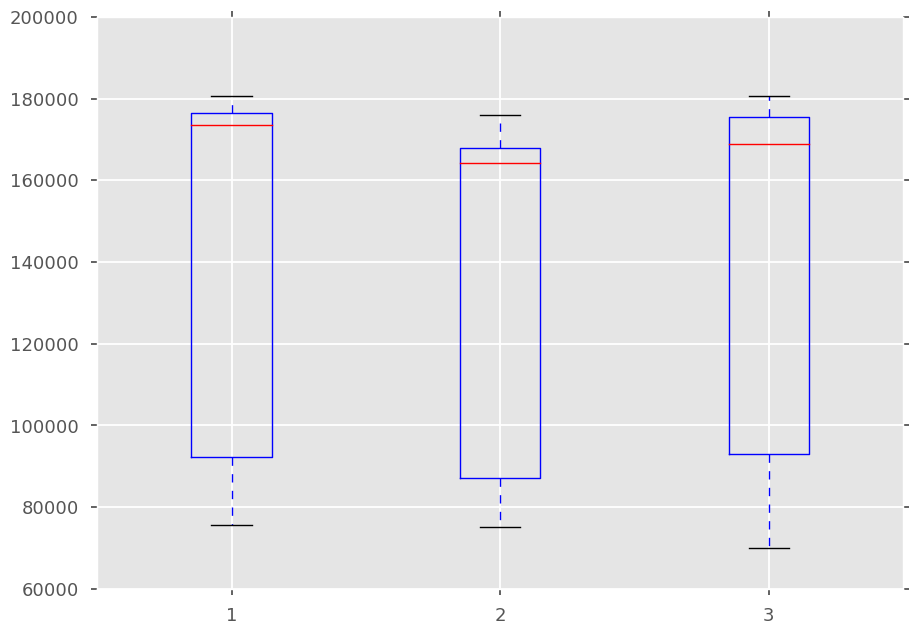

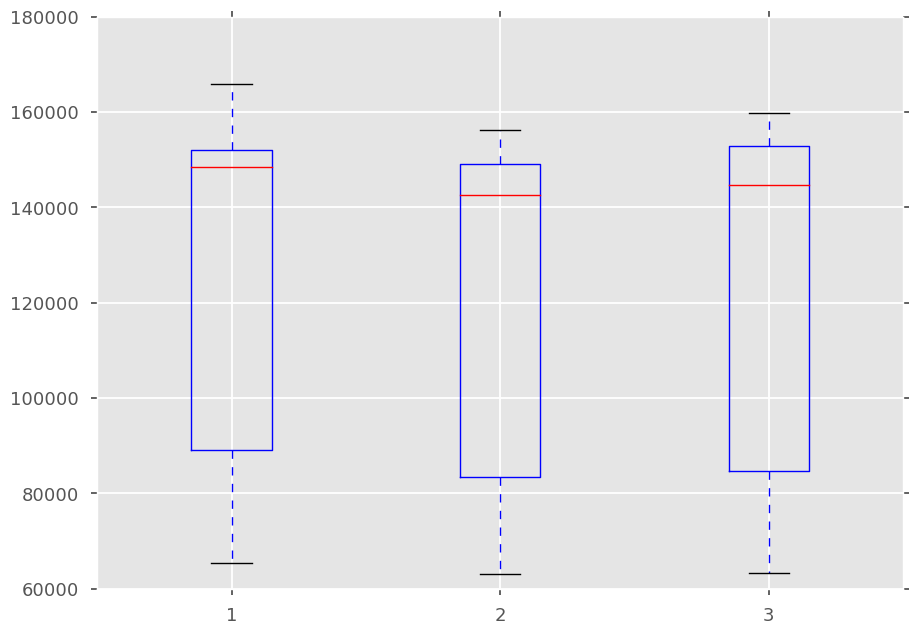

In [135]:
plt.boxplot([df_penn_7_en, df_penn_8_en, df_penn_9_en])
plt.show()
plt.boxplot([df_penn_7_ex, df_penn_8_ex, df_penn_9_ex])
plt.show()

###  Question - 10: Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013


In [9]:
df_station_daily = df_Q3.groupby(['STATION', 'DATE'])['BUSYNESS'].mean().reset_index()
df_station_daily

,STATION,DATE,BUSYNESS
0,1 AVE,07-01-13,653.753846
1,1 AVE,07-02-13,637.652174
2,1 AVE,07-03-13,471.908163
3,1 AVE,07-04-13,495.483871
4,1 AVE,07-05-13,577.521739
5,1 AVE,07-06-13,498.292308
6,1 AVE,07-07-13,482.580645
7,1 AVE,07-08-13,555.067568
8,1 AVE,07-09-13,682.153846
9,1 AVE,07-10-13,743.209677


In [10]:
df_station_daily['BUSYNESS'].describe()

count    35055.000000
mean       260.836484
std        154.652393
min          0.000000
25%        148.931557
50%        236.500000
75%        348.950483
max       1847.333333
Name: BUSYNESS, dtype: float64

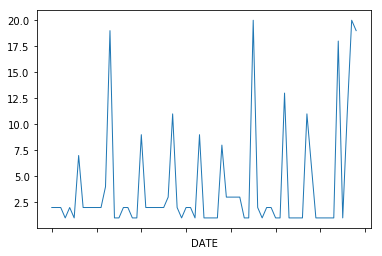

In [11]:
num_close = df_station_daily[df_station_daily['BUSYNESS'] <= 3].groupby('DATE')['STATION'].agg('count')
num_close.plot(linewidth= 1, label = 'Closed Stations')
plt.show()

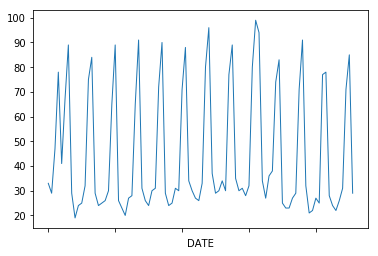

In [12]:
num_low_capacity = df_station_daily[(df_station_daily['BUSYNESS'] <= 100) & (df_station_daily['BUSYNESS'] > 3)].groupby('DATE')['STATION'].agg('count')
num_low_capacity.plot(linewidth= 1, label = 'Stations in Low Capacity')
plt.show()